<h1>Diabetes</h1>

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

**About Dataset**

**Context**

This dataset is originally from the *National Institute of Diabetes and Digestive and Kidney Diseases*. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261-265). IEEE Computer Society Press.

**Inspiration**

Can you build a *machine learning model* to accurately predict whether or not the patients in the dataset have diabetes or not?

<h2>Árbol de decisión</h2>

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age',
             'label']

In [3]:
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [4]:
pima

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

In [5]:
pima.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

In [6]:
pima.describe()

pregnant     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [7]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1) # 70% training and 30% test

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=3,
                             max_depth=8,
                             min_samples_leaf=5
                            )

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [11]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os 

# definir donde vamos a guardar la figura
ROOT_DIR = "."
PATH_FIGURAS = os.path.join(ROOT_DIR, )
os.makedirs(PATH_FIGURAS, exist_ok=True)
export_graphviz(
    clf,
    out_file = os.path.join(PATH_FIGURAS, "arbol_diabetes.dot"),
    feature_names = feature_cols,
    class_names = ['0','1'],
    rounded = True,
    filled = True
)
Source.from_file("arbol_diabetes.dot")

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'arbol_diabetes.dot', '-o', 'arbol_diabetes.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'arbol_diabetes.png')

Fin 1ª parte


<h2>Ensamble</h2>

In [12]:
# cargar librerías
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# crear objeto de la clase BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), 
    n_estimators = 500,
    max_samples = 75, 
    bootstrap=True, # REEMPLAZAMIENTO -> BAGGING
    random_state = 3);

# ajustar el modelo
bag_clf.fit(X_train, y_train);

In [13]:
# obtener estimaciones del modelo sobre la muestra de test
y_pred = bag_clf.predict(X_test)

In [14]:
# comprobar resultados
from sklearn.metrics import accuracy_score
print("Exactitud/accuracy:", accuracy_score(y_test, y_pred))

Exactitud/accuracy: 0.8051948051948052


In [15]:
# crear objeto de la clase BaggingClassifier
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3),
    n_estimators = 500,
    max_samples = 75,
    bootstrap=False, # SIN REEMPLAZAMIENTO -> PASTING
    random_state = 3);

In [16]:
# ajustar el modelo
pas_clf.fit(X_train, y_train);

In [17]:
# obtener estimaciones del modelo sobre la muestra de test
y_pred_pas = pas_clf.predict(X_test);

In [18]:
# comprobar resultados
print("Accuracy:", accuracy_score(y_test, y_pred_pas))

Accuracy: 0.8008658008658008


In [19]:
# cargar librerías
from sklearn.ensemble import RandomForestClassifier

# crear objeto de la clase RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500,
                                 max_leaf_nodes = 4, 
                                 random_state = 3, 
                                 max_samples = 75);

In [20]:
# ajustar el modelo
rnd_clf.fit(X_train, y_train);

In [21]:
# obtener estimaciones del modelo sobre la muestra de test
y_pred_rf = rnd_clf.predict(X_test);

In [22]:
# comprobar resultados
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7792207792207793


In [23]:
# comparar con los resultados de un árbol de decisión
tree_clf = DecisionTreeClassifier(random_state = 3,
                                  max_depth = 3);
tree_clf.fit(X_train, y_train);
y_pred_tree = tree_clf.predict(X_test);
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Accuracy: 0.7575757575757576


<h2>Gradient Boosting</h2>

In [24]:
# cargar librerías
from sklearn.ensemble import GradientBoostingClassifier

# crear objeto de la clase GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 500,
                                    random_state = 3);

In [25]:
# ajustar el modelo
gb_clf.fit(X_train, y_train);

In [26]:
# obtener estimaciones del modelo sobre la muestra de test
y_pred_gb = gb_clf.predict(X_test);

In [27]:
# comprobar resultados
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Accuracy: 0.7532467532467533


In [28]:
# crear un conjunto de posibles valores
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
max_depths = [1, 2, 3, 4]

# inicializamos los vectores de resultados
resultados_test = []

# bucle para extraer resultados
for eta in learning_rates:
    for d in max_depths:
        gb_clf_i = GradientBoostingClassifier(learning_rate = eta,
                                              n_estimators = 500, 
                                              random_state = 3, 
                                              max_depth = d);
        # entrenamos al modelo
        gb_clf_i.fit(X_train, y_train);
        
        # predicción sobre la muestra de validación
        y_pred_test = gb_clf_i.predict(X_test);
        
        # accuracy de entrenamiento
        acc_test = accuracy_score(y_test, y_pred_test);
        
        # guardar resultados en el vector
        resultados_test.append(acc_test);

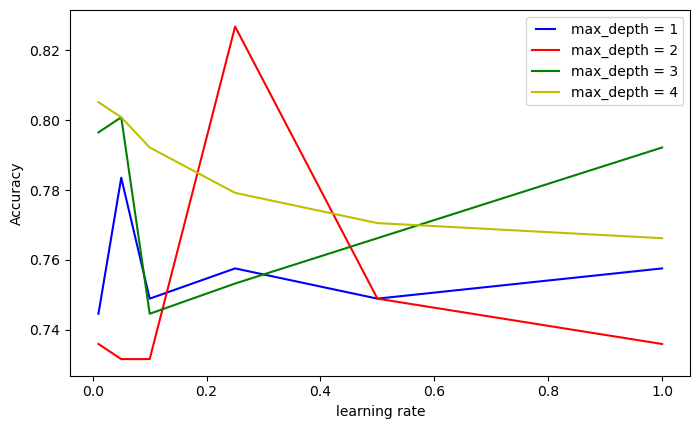

In [29]:
# resultados_test[0:6]   # max_depth = 1
# resultados_test[6:12]  # max_depth = 2
# resultados_test[12:18] # max_depth = 3
# resultados_test[18:24] # max_depth = 4
# learning_rates

# pintamos los resultados de entrenamiento y validación
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(8, 4.75))
line1, = plt.plot(learning_rates, resultados_test[0:6], "b",
                  label = "max_depth = 1")
line2, = plt.plot(learning_rates, resultados_test[6:12], "r",
                  label = "max_depth = 2")
line2, = plt.plot(learning_rates, resultados_test[12:18], "g",
                  label = "max_depth = 3")
line2, = plt.plot(learning_rates, resultados_test[18:24], "y",
                  label = "max_depth = 4")
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 4)})
plt.ylabel("Accuracy")
plt.xlabel("learning rate")
plt.show()

In [30]:
import numpy as np

# importancia1
gb_clf_i1 = GradientBoostingClassifier(learning_rate = 0.01,
                                       n_estimators = 500,
                                       random_state = 3,
                                       max_depth = 1)

gb_clf_i1.fit(X_train, y_train)
importancias = gb_clf_i1.feature_importances_
indices = np.argsort(importancias)[::-1]

In [31]:
# importancia2
gb_clf_i2 = GradientBoostingClassifier(learning_rate = 0.1,
                                       n_estimators = 500,
                                       random_state = 3,
                                       max_depth = 4)

gb_clf_i2.fit(X_train, y_train)
importancias2 = gb_clf_i2.feature_importances_
indices2 = np.argsort(importancias2)[::-1]

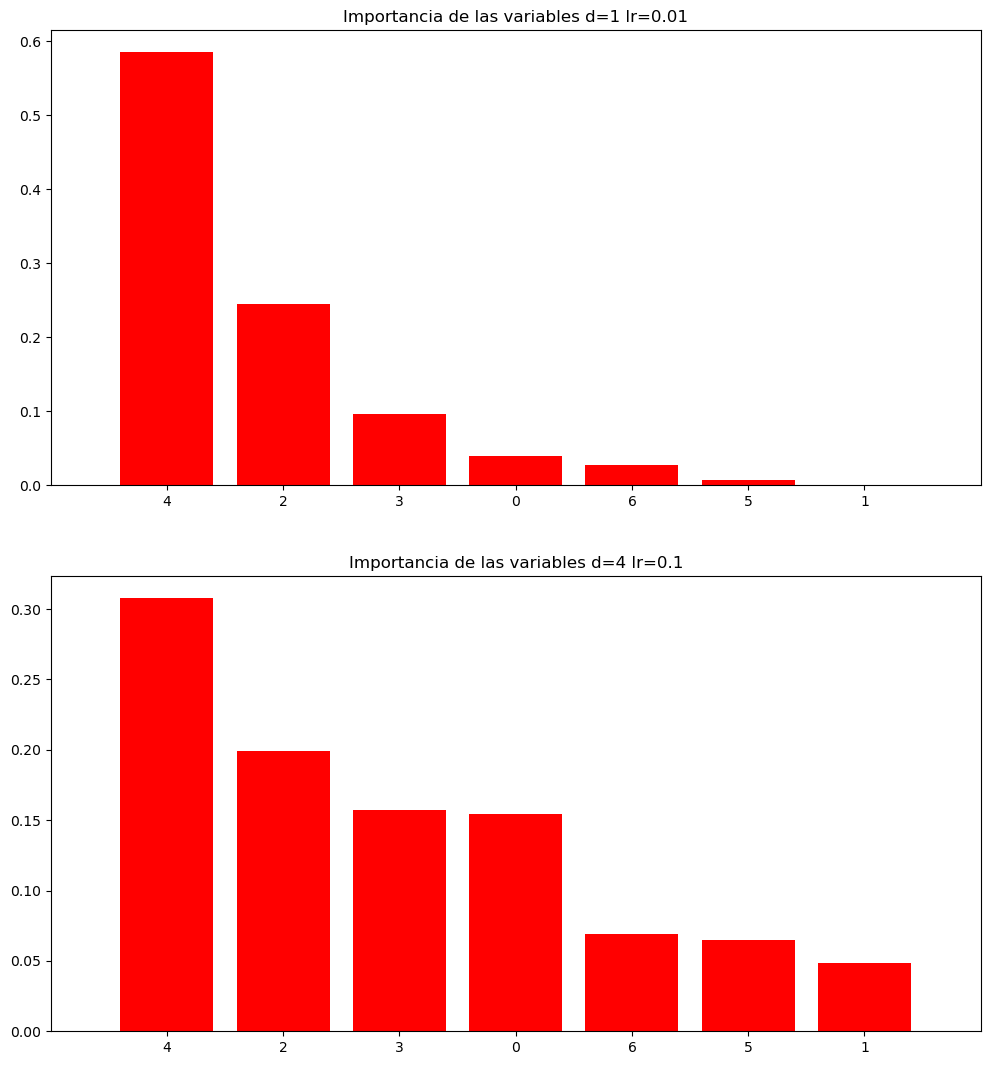

In [32]:
# dibujar_importancias
plt.figure(figsize = (12, 13))
plt.subplot(2, 1, 1)
plt.title("Importancia de las variables d=1 lr=0.01")
plt.bar(range(X.shape[1]), importancias[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.subplot(2, 1, 2)
plt.title("Importancia de las variables d=4 lr=0.1")
plt.bar(range(X.shape[1]), importancias2[indices2],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 88 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  537 non-null    int64  
 1   insulin   537 non-null    int64  
 2   bmi       537 non-null    float64
 3   age       537 non-null    int64  
 4   glucose   537 non-null    int64  
 5   bp        537 non-null    int64  
 6   pedigree  537 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 33.6 KB


Fin 2ª parte